# 1. load data

In [1]:
import pandas as pd

# making data frame from csv file 
df = pd.read_csv('index_keywords_spaced_1.csv',encoding = "ISO-8859-1")

In [2]:
df.head()

,Title,Index_Keywords,FOR,field_name
0,Histograms of oriented gradients for human det...,Computer_vision Database_systems Image_analysi...,801,Artificial Intelligence and Image Processing
1,Deep residual learning for image recognition,Complex_networks Computer_vision Image_recogni...,801,Artificial Intelligence and Image Processing
2,Beyond bags of features: Spatial pyramid match...,Histograms Image_representation Natural_scene_...,801,Artificial Intelligence and Image Processing
3,Going deeper with convolutions,Budget_control Computer_vision Convolution Net...,801,Artificial Intelligence and Image Processing
4,Rich feature hierarchies for accurate object d...,Complex_networks Computer_vision Neural_networ...,801,Artificial Intelligence and Image Processing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27470 entries, 0 to 27469
Data columns (total 4 columns):
Title             27470 non-null object
Index_Keywords    23814 non-null object
FOR               27470 non-null int64
field_name        27470 non-null object
dtypes: int64(1), object(3)
memory usage: 858.5+ KB


In [4]:
df.shape

(27470, 4)

In [5]:
df.columns

Index(['Title', 'Index_Keywords', 'FOR', 'field_name'], dtype='object')

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6)) # 800 * 600

df.groupby('field_name').Index_Keywords.count().plot.bar(ylim=0)

plt.show() # run 2 times, if the figure doesn't show up

<Figure size 800x600 with 1 Axes>

In [7]:

# creating bool series True for NaN values 
not_null_columns = pd.notnull(df['Index_Keywords'])

# filtering data 
df = df[not_null_columns]

In [8]:
df.shape

(23814, 4)

# 2. select volumns


In [9]:
selected_columns = ["Index_Keywords", "field_name"]

df = df[selected_columns]

In [10]:
df.shape

(23814, 2)

In [11]:
df.columns

Index(['Index_Keywords', 'field_name'], dtype='object')

In [12]:
df.head()

,Index_Keywords,field_name
0,Computer_vision Database_systems Image_analysi...,Artificial Intelligence and Image Processing
1,Complex_networks Computer_vision Image_recogni...,Artificial Intelligence and Image Processing
2,Histograms Image_representation Natural_scene_...,Artificial Intelligence and Image Processing
3,Budget_control Computer_vision Convolution Net...,Artificial Intelligence and Image Processing
4,Complex_networks Computer_vision Neural_networ...,Artificial Intelligence and Image Processing


In [13]:
df.loc[0:1, 'Index_Keywords']

0    Computer_vision Database_systems Image_analysi...
1    Complex_networks Computer_vision Image_recogni...
Name: Index_Keywords, dtype: object

# 3. add a new id column

In [14]:
# add a new column
# add a column encoding the product as an integer 
df['category_id'] = pd.factorize(df['field_name'])[0]

In [15]:
df.head(5)

,Index_Keywords,field_name,category_id
0,Computer_vision Database_systems Image_analysi...,Artificial Intelligence and Image Processing,0
1,Complex_networks Computer_vision Image_recogni...,Artificial Intelligence and Image Processing,0
2,Histograms Image_representation Natural_scene_...,Artificial Intelligence and Image Processing,0
3,Budget_control Computer_vision Convolution Net...,Artificial Intelligence and Image Processing,0
4,Complex_networks Computer_vision Neural_networ...,Artificial Intelligence and Image Processing,0


In [16]:
from io import StringIO

category_id_df = df[['field_name', 'category_id']].drop_duplicates().sort_values('category_id')

category_id_df

,field_name,category_id
0,Artificial Intelligence and Image Processing,0
3949,Computer Software,1
7797,Data Format,2
11778,Distributed Computing,3
15728,Information Systems,4
19700,Library and Information Studies,5
23579,Computation Theory and Mathematics,6


# 4. get two dict

In [17]:
category_to_id = dict(category_id_df.values)
category_to_id

{' Artificial Intelligence and Image Processing ': 0,
 'Computer Software ': 1,
 'Data Format ': 2,
 'Distributed Computing ': 3,
 'Information Systems ': 4,
 'Library and Information Studies ': 5,
 ' Computation Theory and Mathematics ': 6}

In [18]:

id_to_category = dict(category_id_df[['category_id', 'field_name']].values)
id_to_category

{0: ' Artificial Intelligence and Image Processing ',
 1: 'Computer Software ',
 2: 'Data Format ',
 3: 'Distributed Computing ',
 4: 'Information Systems ',
 5: 'Library and Information Studies ',
 6: ' Computation Theory and Mathematics '}

# 5. vecterize the 'Index_Keywords' column data

In [19]:
# configure the weapon


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


count_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=1000,
                                stop_words='english',
                               # max_df = 0.5,
                                min_df = 10)



tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, 
                        max_features=1000,           
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')


In [20]:

features = tfidf_vectorizer.fit_transform(df.Index_Keywords).toarray()


features.shape


(23814, 1000)

In [21]:
type(features)

numpy.ndarray

In [22]:
labels = df.category_id

In [23]:
labels.shape

(23814,)

In [24]:
type(labels)

pandas.core.series.Series

In [25]:
# to find the terms that are the most correlated with each of the products:

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for field_name, category_id in sorted(category_to_id.items()):
    
  features_chi2 = chi2(features, labels == category_id)

  indices = np.argsort(features_chi2[0])
    
  feature_names = np.array(tfidf_vectorizer.get_feature_names())[indices]

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

  print("# '{}':".format(field_name))
    
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))

  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# ' Artificial Intelligence and Image Processing ':
  . Most correlated unigrams:
       . multi_agent_systems
       . computer_vision
  . Most correlated bigrams:
       . artificial_intelligence learning_systems
       . proton_exchange_membrane_fuel_cells_ pemfc
# ' Computation Theory and Mathematics ':
  . Most correlated unigrams:
       . computation_theory
       . computer_aided_analysis
  . Most correlated bigrams:
       . polynomial time_algorithms
       . polynomial time
# 'Computer Software ':
  . Most correlated unigrams:
       . erosion
       . software_engineering
  . Most correlated bigrams:
       . android_ operating_system
       . codes_ symbols
# 'Data Format ':
  . Most correlated unigrams:
       . cryptography
       . data_mining
  . Most correlated bigrams:
       . data_mining deep_learning
       . artificial_intelligence computer_science
# 'Distributed Computing ':
  . Most correlated unigrams:
       . grid_computing
       . cluster_computing
  . Mos

# 6. split the data

In [27]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['Index_Keywords'], df['field_name'], random_state = 0)


In [28]:
X_train.shape

(17860,)

In [29]:
y_train.shape

(17860,)

In [30]:
X_test.shape

(5954,)

In [31]:
y_test.shape

(5954,)

# 7.  load the model

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [33]:
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
clf.predict(count_vect.transform([" Cloud computing allows to utilize servers in efficient and scalable ways through exploitation of virtualization technology. In the Infrastructure-as-a-Server (IaaS) Cloud model, many virtualized servers (instances) can be created on a single physical machine. There are many such Cloud providers that are now in widespread use offering such capabilities. However, Cloud computing has overheads and can constrain the scalability and flexibility, especially when diverse users with different needs wish to use the Cloud resources. To accommodate such communities, an alternative to Cloud computing and virtualization of whole servers that is gaining widespread adoption is micro-hosting services and container-based solutions. Container-based technologies such as Docker allow hosting of micro-services on Cloud infrastructures. These enable bundling of applications and data in a manner that allows their easy  "]))


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []


In [35]:

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [36]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

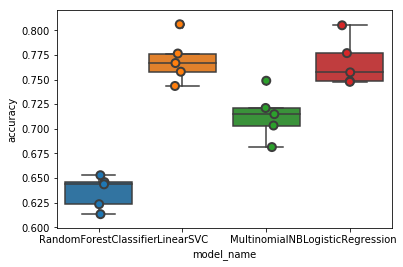

In [37]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [38]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.770129
LogisticRegression        0.767022
MultinomialNB             0.713946
RandomForestClassifier    0.635925
Name: accuracy, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'Product'

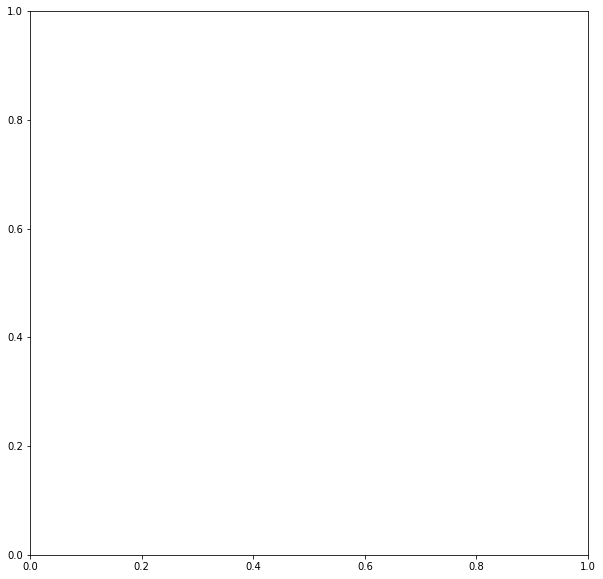

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['field_name'].unique()))